In [1]:
import math
import matplotlib.pyplot as plt

#### Problem 2

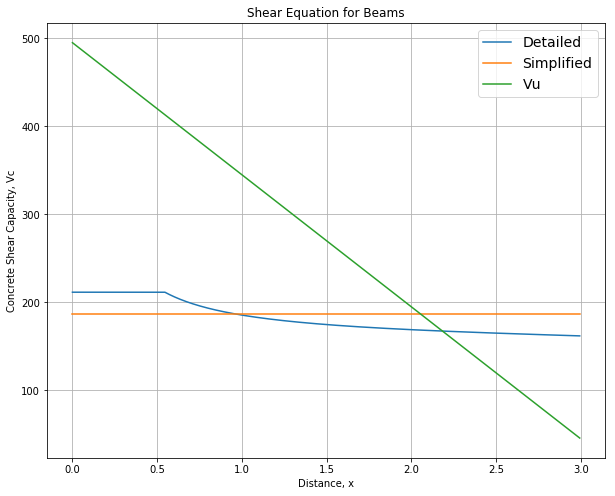

In [2]:
fcPrime = 27.5
fy = 275
b = 375
d = 570
DL = 45            # kN/m
LL = 60            # kN/m
L = 6000           # mm
a = L / 2          # Mid of beam
As = 3000          # 4 - 20mm dia.
p = As / (b * d)   # rho

# Vc using simplified method
vc1 = 1 / 6 * math.sqrt(fcPrime) * b * d

# Calculate reaction at A for combined loading
wu = 1.2 * DL + 1.6 * LL
ra = wu * L / 2    # Reaction at left support

# For the shear envelop
rb_e = LL * (L / 2 * (L / 4)) / L

# Divide half of the beam to a thousand parts
increment = a / 1000

xs = []
vcs = []
vus = []
simp = []

x = 0

for i in range(1, 1000):
    vu = rb_e + (ra / a) * (a - x)
    mu = (ra + vu) / 2 * x
    
    if (vu * d > mu):
        mu = vu * d
    
    vc = (1.0 / 7.0) * (math.sqrt(fcPrime) + 120 * p * (vu * d / mu)) * b * d 
    
    xs.append(x/1000)
    vcs.append(vc/1000)
    vus.append(vu/1000)
    simp.append(vc1/1000)
    
    x = increment * i
    
# Plot the curves
plt.figure(figsize=(10,8))
plt.title("Shear Equation for Beams")
plt.xlabel('Distance, x')
plt.ylabel('Concrete Shear Capacity, Vc')
plt.grid()

detailed, = plt.plot(xs, vcs, label='Detailed')
simplified, = plt.plot(xs, simp, label='Simplified')
vu, = plt.plot(xs, vus, label='Vu')
plt.legend(handles=[detailed, simplified, vu], loc='best', fontsize=14)
plt.show()